In [28]:
from google.colab import files
uploaded = files.upload()

Saving customer_reviews.csv to customer_reviews.csv


Missing Values Per Column:
 Review_ID           0
Review_Text         2
Rating              2
Customer_Age        3
Product_Price       0
Product_Category    0
dtype: int64


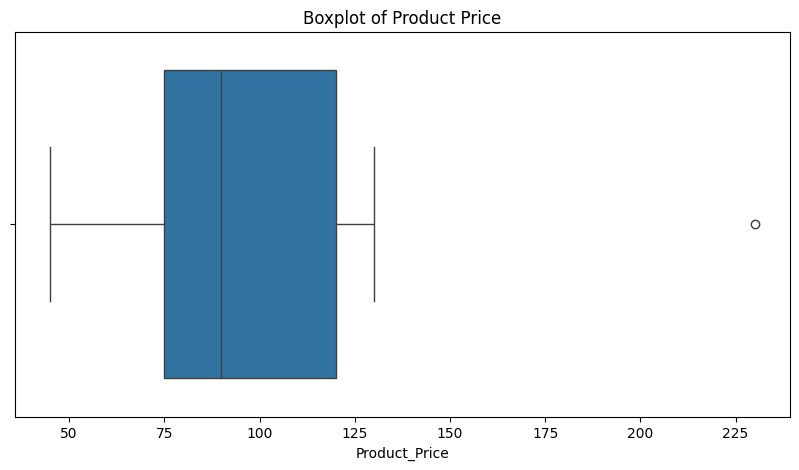


Data Cleaning Completed. Cleaned dataset saved as 'customer_reviews_cleaned.csv'


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("customer_reviews.csv")  # Replace with actual file path

# Identify missing values
missing_values = df.isna().sum()
print("Missing Values Per Column:\n", missing_values)

# Handling missing values
num_imputer = SimpleImputer(strategy='median')
df['Customer_Age'] = num_imputer.fit_transform(df[['Customer_Age']])
df['Rating'] = num_imputer.fit_transform(df[['Rating']])

def impute_review(text):
    return "No review provided" if pd.isna(text) else text

df['Review_Text'] = df['Review_Text'].apply(impute_review)

# Detect and remove duplicates
df.drop_duplicates(subset=['Review_Text'], keep='first', inplace=True)

# Handle inconsistent data
# Ensure ratings are between 1-5
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]

# Standardize Product_Category spelling
df['Product_Category'] = df['Product_Category'].str.strip().str.lower()

# Identify and handle outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Product_Price'])
plt.title("Boxplot of Product Price")
plt.show()

# Convert categorical data into numerical format if required
df = pd.get_dummies(df, columns=['Product_Category'], drop_first=True)

# Save the cleaned dataset
df.to_csv("customer_reviews_cleaned.csv", index=False)

print("\nData Cleaning Completed. Cleaned dataset saved as 'customer_reviews_cleaned.csv'")
